## I have Titanic dataset downloaded from Kaggle Titanic Competition.
#### https://www.kaggle.com/competitions/titanic/data

### It is in 3 files - training set, testing set and an example submission file. We'll clean the training set and format it in preparation for an EDA.

Contents:
1. import libraries
2. read the data
3. check heads, dtypes and info
4. fill in null values
5. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data in as a pandas dataframe. 3 files -> 3 DFs

In [2]:
training_df = pd.read_csv("../data/raw/train.csv")
testing_df = pd.read_csv("../data/raw/test.csv")
# gender_df = pd.read_csv("data/raw/gender_submission.csv")
# gender_submission is an example file to show how the submission file should look like after making predictions

In [3]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testing_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("training data shape: ", training_df.shape)
print("testing data shape: ", testing_df.shape)

training data shape:  (891, 12)
testing data shape:  (418, 11)


In [7]:
training_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In both sets, there are missing cells. Will have to take care of them

In training set, Age is missing almost 20% values.  Dropping this column is not good, neither is deleting these rows.
We will have to fill it with something. Simple median is good, but it does not incorporate any correlation with other columns in the dataset.
So, we move forward with grouped imputation.

Grouped imputations involve filling in missing values by considering groups within the dataset. Instead of applying a general imputation strategy (like mean or median for the entire column), you group the data based on a relevant categorical feature and then impute missing values using statistics from that group.


How to know which columns to use for this grouped imputation? Find which columns correlate to the Age columns

In [10]:
numeric_df = training_df.select_dtypes(include=['number'])

print(numeric_df.corr()['Age'].sort_values(ascending=False))

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64


The columns 'Parch', 'SibSp', 'Pclass' correlate significantly with the 'Age' column.

In [11]:
training_df.groupby(['Pclass', 'Sex', 'Parch'])['Age'].median()


Pclass  Sex     Parch
1       female  0        35.0
                1        41.5
                2        22.0
        male    0        42.0
                1        43.5
                2        18.0
                4        64.0
2       female  0        30.0
                1        25.0
                2        22.0
                3        39.0
        male    0        31.0
                1        13.5
                2        25.0
3       female  0        22.0
                1         9.0
                2         9.5
                3        36.0
                4        37.0
                5        39.0
                6        43.0
        male    0        26.0
                1        14.0
                2         9.0
                3        16.0
                4        40.0
                5        39.0
Name: Age, dtype: float64

This data provides insight into typical passenger ages within different categories. It helps us understand age distribution trends among different groups.
We can use this to fill in the missing Age values in both the datasets.

In [12]:
training_df['Age'] = training_df.groupby(['Pclass', 'Sex', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))
testing_df['Age'] = testing_df.groupby(['Pclass', 'Sex', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))


e:\AI_ML\Python-Workbook\EDA-Titanic\ml-env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
e:\AI_ML\Python-Workbook\EDA-Titanic\ml-env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
e:\AI_ML\Python-Workbook\EDA-Titanic\ml-env\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              3
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

testing set still has 3 null cells under Age. Let's fill it with just Pclass grouped median

In [14]:
testing_df['Age'] = testing_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [15]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

fare has 1 missing cell. we can fill it with Pclass' average

In [16]:
testing_df['Fare'] = testing_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))

In [17]:
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [18]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now, for Cabin, we can just fill the empty cells with 'unknown' value. But, that would be an uninformed decision.
We have some options - 

❌ Drop Cabin if it’s not useful.

✅ Extract Deck if it provides useful insights: Instead of using full cabin numbers, extract the deck letter (A, B, C, etc.), which may still be useful.

✅ Use Has_Cabin as a simple feature for ML models: If we assume that passengers in the same Pclass had similar cabin locations, we can fill missing values with the most common Deck per class

✅ Impute using Pclass if you want to keep more information: If Cabin is missing for many passengers, it may indicate that those without a cabin were lower-class passengers (which could impact survival). We can create a binary feature instead

Let's analyze how the Deck (Cabin's first letter) relates to survival.

In [19]:
# extract deck into a new column
# training_df['Deck'] = training_df['Cabin'].astype(str).str[0]  ->   converts nan to 'n'

training_df['Deck'] = training_df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else np.nan)


In [20]:
testing_df['Deck'] = testing_df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else np.nan)

In [21]:
set(testing_df['Deck'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', nan}

In [22]:
# survival rate for each deck
deck_survival = training_df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)
print(deck_survival)

Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
T    0.000000
Name: Survived, dtype: float64


C:\Users\ompan\AppData\Local\Temp\ipykernel_22204\1551886327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deck_survival.index, y=deck_survival.values, palette='viridis')


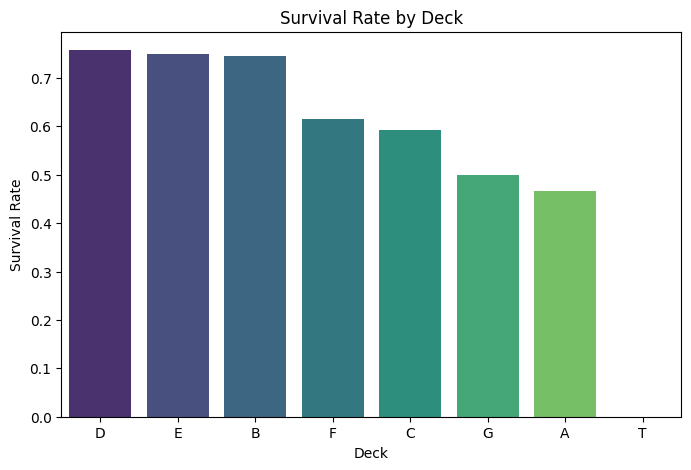

In [23]:

plt.figure(figsize=(8,5))
sns.barplot(x=deck_survival.index, y=deck_survival.values, palette='viridis')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Deck')
plt.show()

In [24]:
print(training_df.columns)
#set(training_df['Deck'][:])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')


In [25]:
most_common_deck = training_df.groupby('Pclass')['Deck'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'U')
training_df['Deck'] = training_df.apply(lambda row: most_common_deck[row['Pclass']] if pd.isnull(row['Deck']) else row['Deck'], axis=1)


In [26]:
set(training_df['Deck'].values)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [27]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [28]:
# drop cabin column now
training_df.drop(columns=['Cabin'], inplace=True)


C:\Users\ompan\AppData\Local\Temp\ipykernel_22204\216667292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deck_survival.index, y=deck_survival.values, palette='viridis')


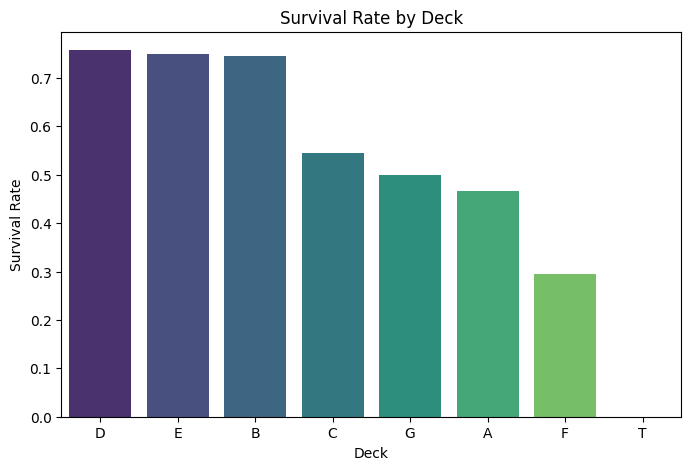

In [29]:
deck_survival = training_df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=deck_survival.index, y=deck_survival.values, palette='viridis')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Deck')
plt.show()

In [30]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Fix testing dataset also.

In [31]:
most_common_deck = testing_df.groupby('Pclass')['Deck'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'U')
testing_df['Deck'] = testing_df.apply(lambda row: most_common_deck[row['Pclass']] if pd.isnull(row['Deck']) else row['Deck'], axis=1)

In [32]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [33]:
# drop cabin column now
testing_df.drop(columns=['Cabin'], inplace=True)


In [34]:
training_df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
training_df['Embarked'].fillna('S', inplace=True)
print(training_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64


C:\Users\ompan\AppData\Local\Temp\ipykernel_22204\4010748097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_df['Embarked'].fillna('S', inplace=True)


In [36]:
print(testing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Deck         418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [37]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can now save these data sets into different files to continue our EDA

In [5]:
training_df.to_csv("../data/processed/cleaned_training_data.csv", index=False)
testing_df.to_csv("../data/processed/cleaned_testing_data.csv", index=False)